### Description:
In this notebook I will try to EDA the email contents

In [ ]:
import pandas as pd
import math
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Import data and print some rows

In [113]:
df = pd.read_csv("enron_test.csv")
print("DF shape:", df.shape)
df.head()

DF shape: (1000, 6)


,Date,From,To,Subject,content,new_date
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Here is our forecast\n\n,2001-05-14 23:39:00
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Traveling to have a business meeting takes the...,2001-05-04 20:51:00
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,test successful. way to go!!!,2000-10-18 10:00:00
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00


### Exploration #1:
### Get unique subjects and their counts
Need to see what they look like

In [135]:
# Get list of original subjects
orig_subjects = [s for s in df.Subject.tolist() if isinstance(s, str)]

# Get unique subject counts and sort by their counts in descending order
orig_subject_counts = Counter(orig_subjects)
orig_subject_counts = [(v,k) for k,v in orig_subject_counts.most_common()]

# Print unique subject count
print("Count of unique subjects:", len(orig_subject_counts))
orig_subject_counts[:20]

Count of unique subjects: 347


[(53, 'Re:'),
 (7, 'Re: Resume'),
 (6, 'Westgate Proforma-Phillip Allen.xls'),
 (6, 'Request from Steve Kean'),
 (6, "Re: This morning's Commission meeting delayed"),
 (6, 'Re: The Stage'),
 (5, 'Investment Structure'),
 (5, 'Re: (No Subject)'),
 (5, 'New Notice from Transwestern Pipeline Co.'),
 (4, 'Consolidated positions: Issues & To Do list'),
 (4, 'San Juan Index'),
 (4, 'Re: receipts'),
 (4, 'Daily Report'),
 (4, 'Re: New Notice from Transwestern Pipeline Co.'),
 (4, 'assoc. for west desk'),
 (4, 'Re: Katy flatlands'),
 (4, 'Re: #30'),
 (4, 'Western Strategy Session Materials'),
 (4, 'Alliance netback worksheet'),
 (4, 'Maps')]

### Findings in step #1:
1 - Many subjects has prefixes like "Re: ", "Fe: "

### Cleaning #1: 
### Do some according to findings above

In [ ]:
# Remove all prefixes like Re: Fe:
clean_subjects = [re.sub('\w{2}\: *', '', s) for s in orig_subjects]

# Remove empty strings
clean_subjects = [s for s in clean_subjects if s!=''] 

# Get unique subject counts and sort by their counts in descending order
clean_subject_counts = Counter(clean_subjects)
clean_subjects_cnt = [(v,k) for k,v in clean_subject_counts.most_common()]

# Print unique subject count
print("Count of unique subjects:", len(clean_subjects_cnt))

In [138]:
# Print first N subjects and their counts (desc order)
clean_subjects_cnt[:200]

[(9, 'Request from Steve Kean'),
 (9, 'New Notice from Transwestern Pipeline Co.'),
 (8, 'The Stage'),
 (7, 'Resume'),
 (6, 'Westgate Proforma-Phillip Allen.xls'),
 (6, "This morning's Commission meeting delayed"),
 (6, 'Maps'),
 (6, 'W basis quotes'),
 (6, 'Presentation to Trading Track A&A'),
 (6, 'SanJuan/SoCal spread prices'),
 (6, 'Buyout'),
 (5, 'Investment Structure'),
 (5, '(No Subject)'),
 (5, 'Instructions for FERC Meetings'),
 (5, 'Enron Response to San Diego Request for Gas Price Caps'),
 (4, 'Consolidated positioIssues & To Do list'),
 (4, 'San Juan Index'),
 (4,
  'Receipt of Team Selection Form - Executive Impact & Influence\n Program'),
 (4, 'receipts'),
 (4, 'Daily Report'),
 (4, 'TRANSPORTATION MODEL'),
 (4, 'assoc. for west desk'),
 (4, 'Katy flatlands'),
 (4, 'Thoughts on Presentation'),
 (4, '91 acres'),
 (4, 'SW Gas'),
 (4, '#30'),
 (4, 'Western Strategy Session Materials'),
 (4, 'Alliance netback worksheet'),
 (4, 'Inspection for Mission South'),
 (4, 'apt. #2'),

### Exploration #2:
### Sorting clean subjects in different ways in search of easy patterns

In [142]:
# Sorting the subjects by lenght
clean_subjects = sorted(clean_subjects, key=len, reverse=False)
print("Subjects count:", len(clean_subjects))
clean_subjects[:300]

Subjects count: 641


['#30',
 '#30',
 '#30',
 '#30',
 'FYI',
 'FYI',
 'Wow',
 'Wow',
 'eol',
 'eol',
 'Maps',
 'Maps',
 'Maps',
 'Maps',
 'Maps',
 'Maps',
 'Wade',
 'Wade',
 'test',
 'test',
 'test',
 'Enron',
 'Enron',
 'Hello',
 'Hello',
 'SM134',
 'SM134',
 'lunch',
 'lunch',
 'Buyout',
 'Buyout',
 'Buyout',
 'Buyout',
 'Buyout',
 'Buyout',
 'MS 150',
 'MS 150',
 'MS 150',
 'Memory',
 'Memory',
 'Resume',
 'Resume',
 'Resume',
 'Resume',
 'Resume',
 'Resume',
 'Resume',
 'SW Gas',
 'SW Gas',
 'SW Gas',
 'SW Gas',
 'access',
 'access',
 'burnet',
 'burnet',
 '5/08/00',
 '5/08/00',
 '91acres',
 '91acres',
 'Notices',
 'Notices',
 'Resumes',
 'Resumes',
 'Resumes',
 'apt. #2',
 'apt. #2',
 'apt. #2',
 'apt. #2',
 'closing',
 'closing',
 '32 acres',
 '91 acres',
 '91 acres',
 '91 acres',
 '91 acres',
 'For Wade',
 'For Wade',
 'Location',
 'Location',
 'Westgate',
 'Westgate',
 'dopewars',
 'dopewars',
 'password',
 'receipts',
 'receipts',
 'receipts',
 'receipts',
 'tv on 33',
 'tv on 33',
 'web site',
 '

In [143]:
# Sorting the subjects alphabetically
clean_subjects = sorted(clean_subjects)  # sort subjects 
print("Subjects count:", len(clean_subjects))
clean_subjects[:300]

Subjects count: 641


['"Save the Date" - Associate / Analyst Program',
 '#30',
 '#30',
 '#30',
 '#30',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(Reminder) Update GIS Information',
 '(Reminder) Update GIS Information',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2001 Margin Plan',
 '2001 Margin Plan',
 '220,000 MW of New Capacity Needed by 2012',
 '220,000 MW of New Capacity Needed by 2012',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '32 acres',
 '4-URGENT - OWA Please print this now.'

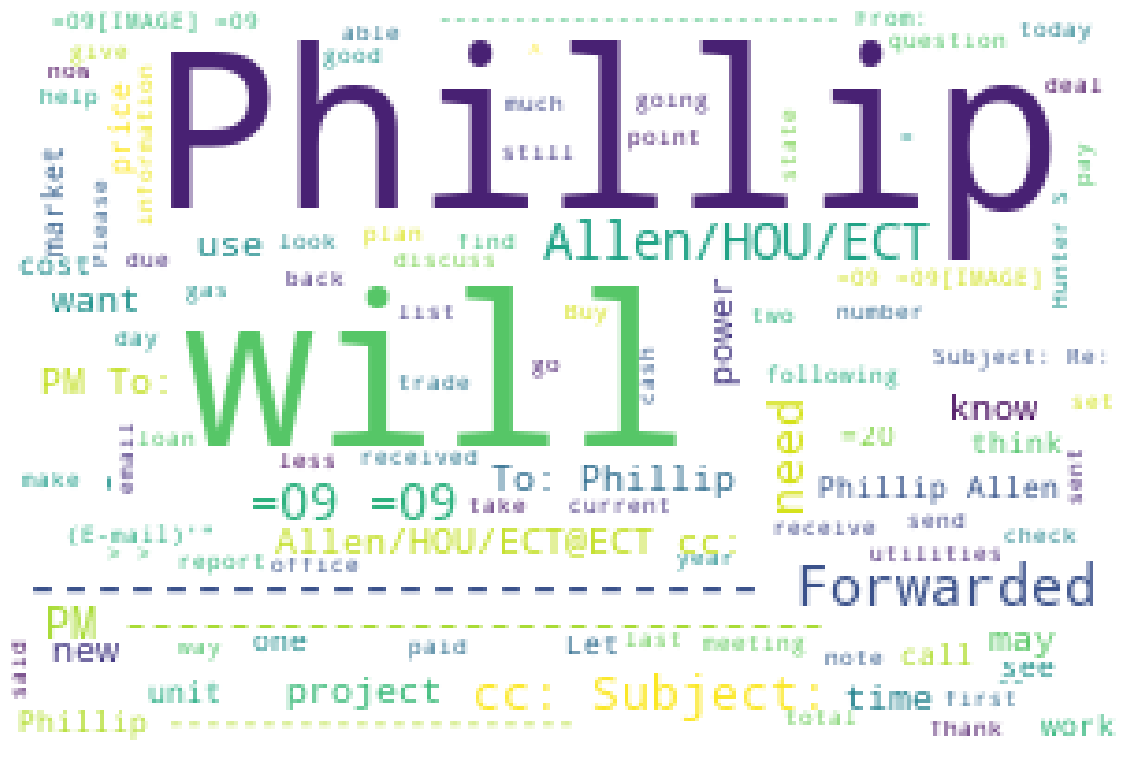

In [150]:
# Create wordcloud for dirty text

dirty_content = " ".join(c for c in df.content)

wordcloud = WordCloud(max_font_size=60, max_words=100,
                      width = 300, height = 200, 
                      background_color="white", 
                      collocations=True,
                      random_state=2, 
                      stopwords = STOPWORDS,
                      regexp="[^\s]+").generate(dirty_content)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()